# Resultados da execução de Julho/2020

In [1]:
import pandas as pd
df = pd.read_csv("results_frozen_lake.csv")

In [2]:
df.head()

,alpha,gamma,epsilon,episodes,rewards
0,1.0,0.99,0.9,10000,4
1,1.0,0.99,0.9,50000,0
2,1.0,0.99,0.9,100000,0
3,1.0,0.99,0.8,10000,10
4,1.0,0.99,0.8,50000,0


In [3]:
df.shape

(864, 5)

In [19]:
df.sort_values(by=['rewards'], ascending=False).head(5)

,alpha,gamma,epsilon,episodes,rewards
400,0.80,0.95,0.8,50000,91
397,0.80,0.95,0.9,50000,90
779,0.20,0.99,0.5,100000,89
120,0.95,0.90,0.9,10000,89
773,0.20,0.99,0.8,100000,89


In [20]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

df_ = pd.DataFrame(min_max_scaler.fit_transform(df), 
                  columns=df.columns)

In [21]:
df_.head()

,alpha,gamma,epsilon,episodes,rewards
0,1.0,1.0,1.00,0.000000,0.043956
1,1.0,1.0,1.00,0.444444,0.000000
2,1.0,1.0,1.00,1.000000,0.000000
3,1.0,1.0,0.75,0.000000,0.109890
4,1.0,1.0,0.75,0.444444,0.000000


In [22]:
y = df_['rewards']
X = df_[['alpha','gamma','epsilon','episodes']]

In [23]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                rewards   R-squared (uncentered):                   0.755
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                              662.1
Date:                Mon, 14 Sep 2020   Prob (F-statistic):                   8.92e-261
Time:                        15:25:30   Log-Likelihood:                         -39.663
No. Observations:                 864   AIC:                                      87.33
Df Residuals:                     860   BIC:                                      106.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alpha         -0.1383      0.022     -6.387      0.000      -0.181      -0.096
gamma          0.5206      0.022     24.065      0.000       0.478       0.563
epsilon        0.0176      0.021      0.840      0.401      -0.024       0.059
episodes       0.2613      0.020     13.153      0.000       0.222       0.300
==============================================================================
Omnibus:                       15.987   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.019
Skew:                          -0.151   Prob(JB):                      0.00405
Kurtosis:                       2.536   Cond. No.                         3.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Resultados da execução de setembro / 2020

In [28]:
df2 = pd.read_csv("finalResults_FrozenLake_final.csv", sep=';', header=None)
df2.head()

,0,1,2,3,4,5,6
0,NaN,0.1,0.95,0.7,10000.0,77.0,NaN
1,NaN,0.1,0.95,0.7,100000.0,79.0,NaN
2,NaN,0.1,0.95,0.8,10000.0,46.0,NaN
3,NaN,0.1,0.95,0.8,100000.0,74.0,NaN
4,NaN,0.1,0.99,0.7,10000.0,86.0,NaN


In [29]:
df2.shape

(1744, 7)

In [30]:
df2 = df2.iloc[:,[1,2,3,4,5]]

In [31]:
df2.head()

,1,2,3,4,5
0,0.1,0.95,0.7,10000.0,77.0
1,0.1,0.95,0.7,100000.0,79.0
2,0.1,0.95,0.8,10000.0,46.0
3,0.1,0.95,0.8,100000.0,74.0
4,0.1,0.99,0.7,10000.0,86.0


In [32]:
df2.columns=['alpha','gamma','epsilon','episodes','rewards']
df2.head()

,alpha,gamma,epsilon,episodes,rewards
0,0.1,0.95,0.7,10000.0,77.0
1,0.1,0.95,0.7,100000.0,79.0
2,0.1,0.95,0.8,10000.0,46.0
3,0.1,0.95,0.8,100000.0,74.0
4,0.1,0.99,0.7,10000.0,86.0


In [33]:
df2 = df2.drop_duplicates()
df2.shape

(872, 5)

<AxesSubplot:ylabel='Frequency'>

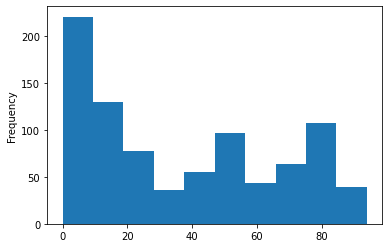

In [34]:
df2['rewards'].plot(kind='hist')

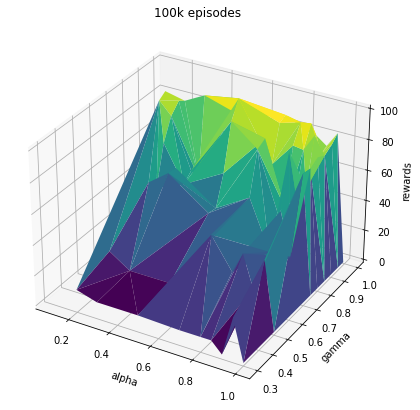

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

df3 = df2[df2['episodes'] == 100000]

fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')
ax.plot_trisurf(df3['alpha'], df3['gamma'], df3['rewards'], cmap=plt.cm.viridis)
ax.set_title('100k episodes')
ax.set_xlabel('alpha')
ax.set_ylabel('gamma')
ax.set_zlabel('rewards')
ax.set_zlim(0, 100)
plt.show()

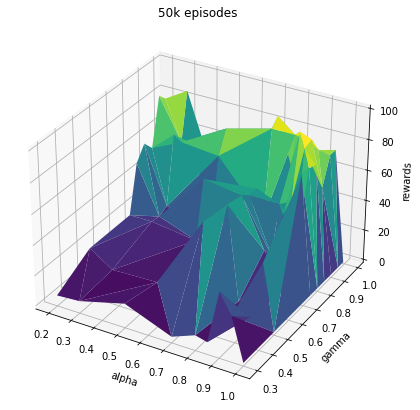

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

df3 = df2[df2['episodes'] == 50000]

fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')
ax.plot_trisurf(df3['alpha'], df3['gamma'], df3['rewards'], cmap=plt.cm.viridis)
ax.set_title('50k episodes')
ax.set_xlabel('alpha')
ax.set_ylabel('gamma')
ax.set_zlabel('rewards')
ax.set_zlim(0, 100)
plt.show()

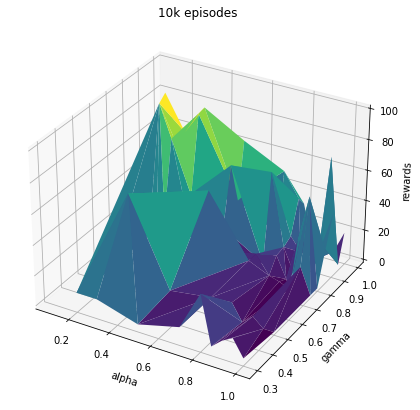

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

df3 = df2[df2['episodes'] == 10000]

fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')
ax.plot_trisurf(df3['alpha'], df3['gamma'], df3['rewards'], cmap=plt.cm.viridis)
ax.set_title('10k episodes')
ax.set_xlabel('alpha')
ax.set_ylabel('gamma')
ax.set_zlabel('rewards')
ax.set_zlim(0, 100)
plt.show()

In [38]:
df2.sort_values(by='rewards', ascending=False).head(5)

,alpha,gamma,epsilon,episodes,rewards
264,0.50,0.95,0.7,100000.0,94.0
262,0.50,0.95,0.5,50000.0,90.0
553,0.80,0.95,0.7,50000.0,90.0
763,0.90,0.99,0.9,50000.0,90.0
459,0.85,0.95,0.8,100000.0,90.0


In [41]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

df2_ = pd.DataFrame(min_max_scaler.fit_transform(df2), 
                  columns=df.columns)

In [42]:
y = df2_['rewards']
X = df2_[['alpha','gamma','epsilon','episodes']]

In [43]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                rewards   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.751
Method:                 Least Squares   F-statistic:                              657.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):                   5.89e-261
Time:                        15:33:29   Log-Likelihood:                         -28.931
No. Observations:                 872   AIC:                                      65.86
Df Residuals:                     868   BIC:                                      84.94
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alpha         -0.1279      0.022     -5.729      0.000      -0.172      -0.084
gamma          0.5012      0.022     23.159      0.000       0.459       0.544
epsilon        0.0171      0.021      0.814      0.416      -0.024       0.058
episodes       0.2663      0.020     13.573      0.000       0.228       0.305
==============================================================================
Omnibus:                       19.511   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.741
Skew:                          -0.191   Prob(JB):                      0.00104
Kurtosis:                       2.519   Cond. No.                         3.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""